In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\data\Netflix\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
def summary(df):
    print(f"Dataset has {df.shape[1]} columns and {df.shape[0]} rows.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 12 columns and 8807 rows.


,Unique,Missing,Duplicated,Types
show_id,8807,0,0,object
type,2,0,0,object
title,8807,0,0,object
director,4528,2634,0,object
cast,7692,825,0,object
country,748,831,0,object
date_added,1767,10,0,object
release_year,74,0,0,int64
rating,17,4,0,object
duration,220,3,0,object


<Axes: >

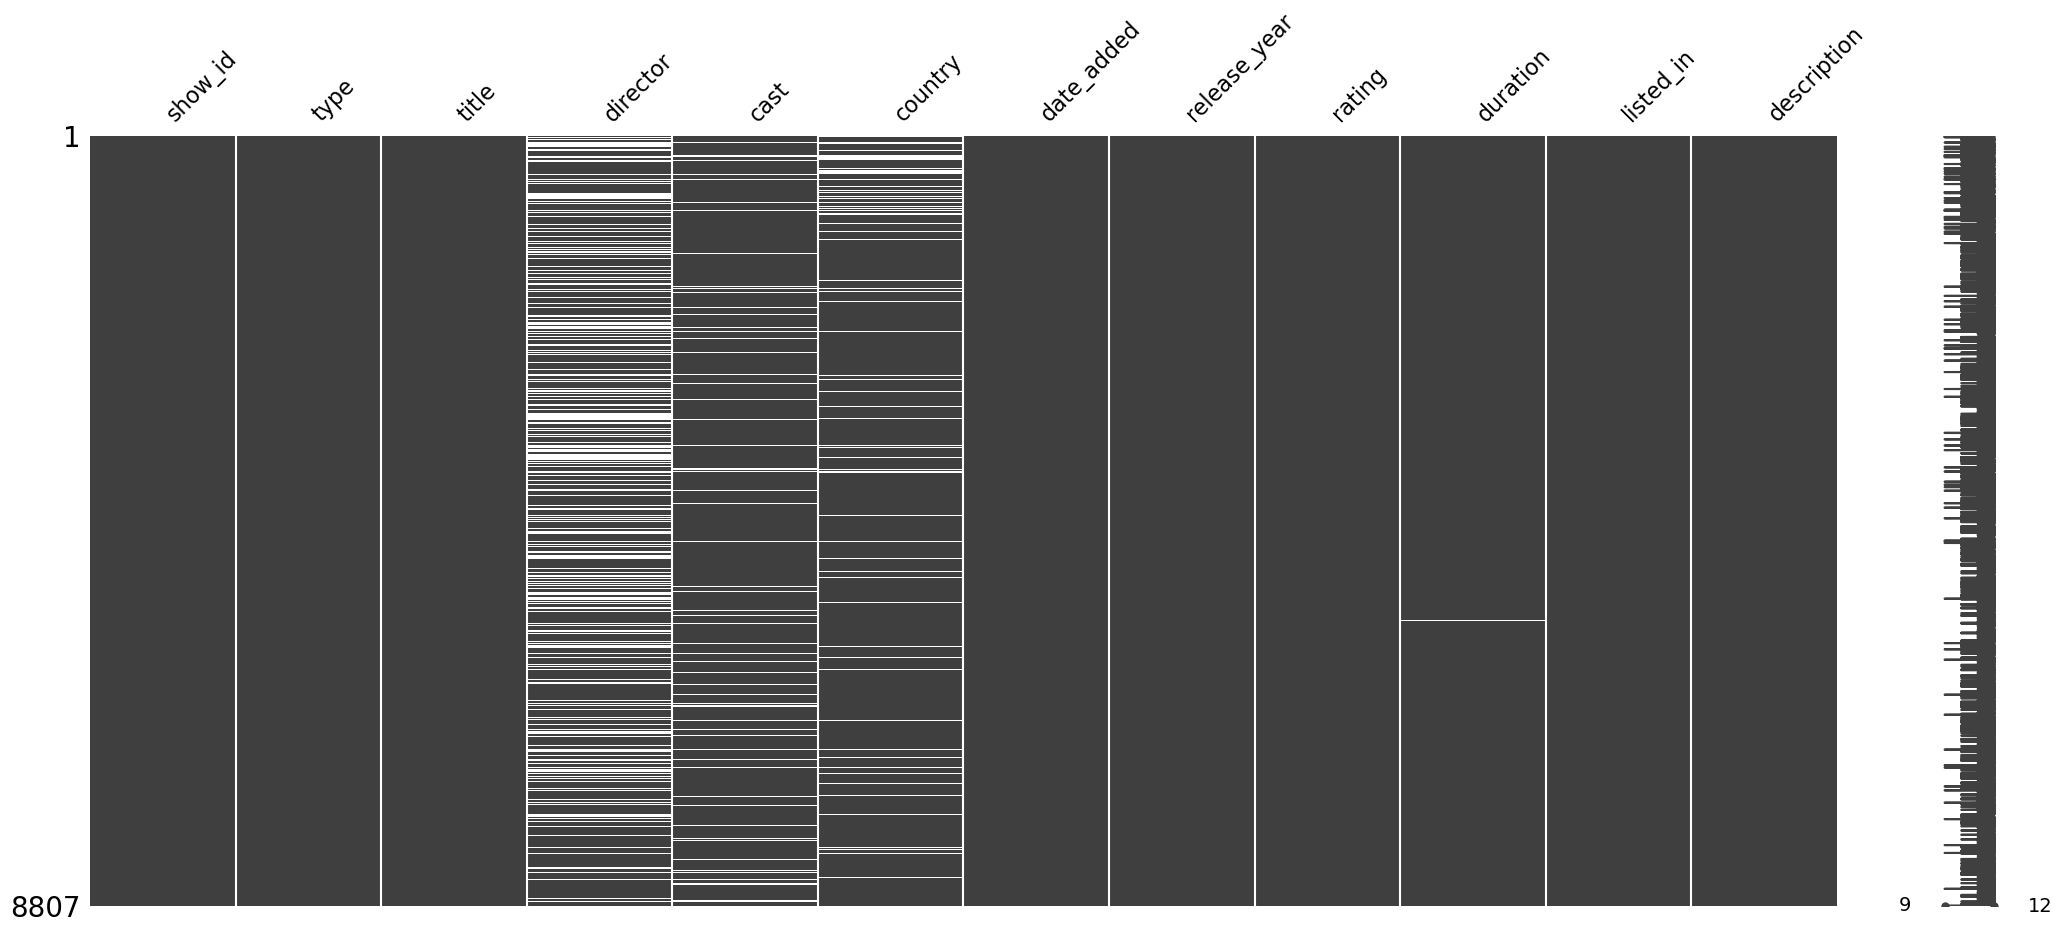

In [7]:
msno.matrix(df)

(<Axes: title={'center': '% of NaN (from 8807 lines)'}>, 4.075833333333333)

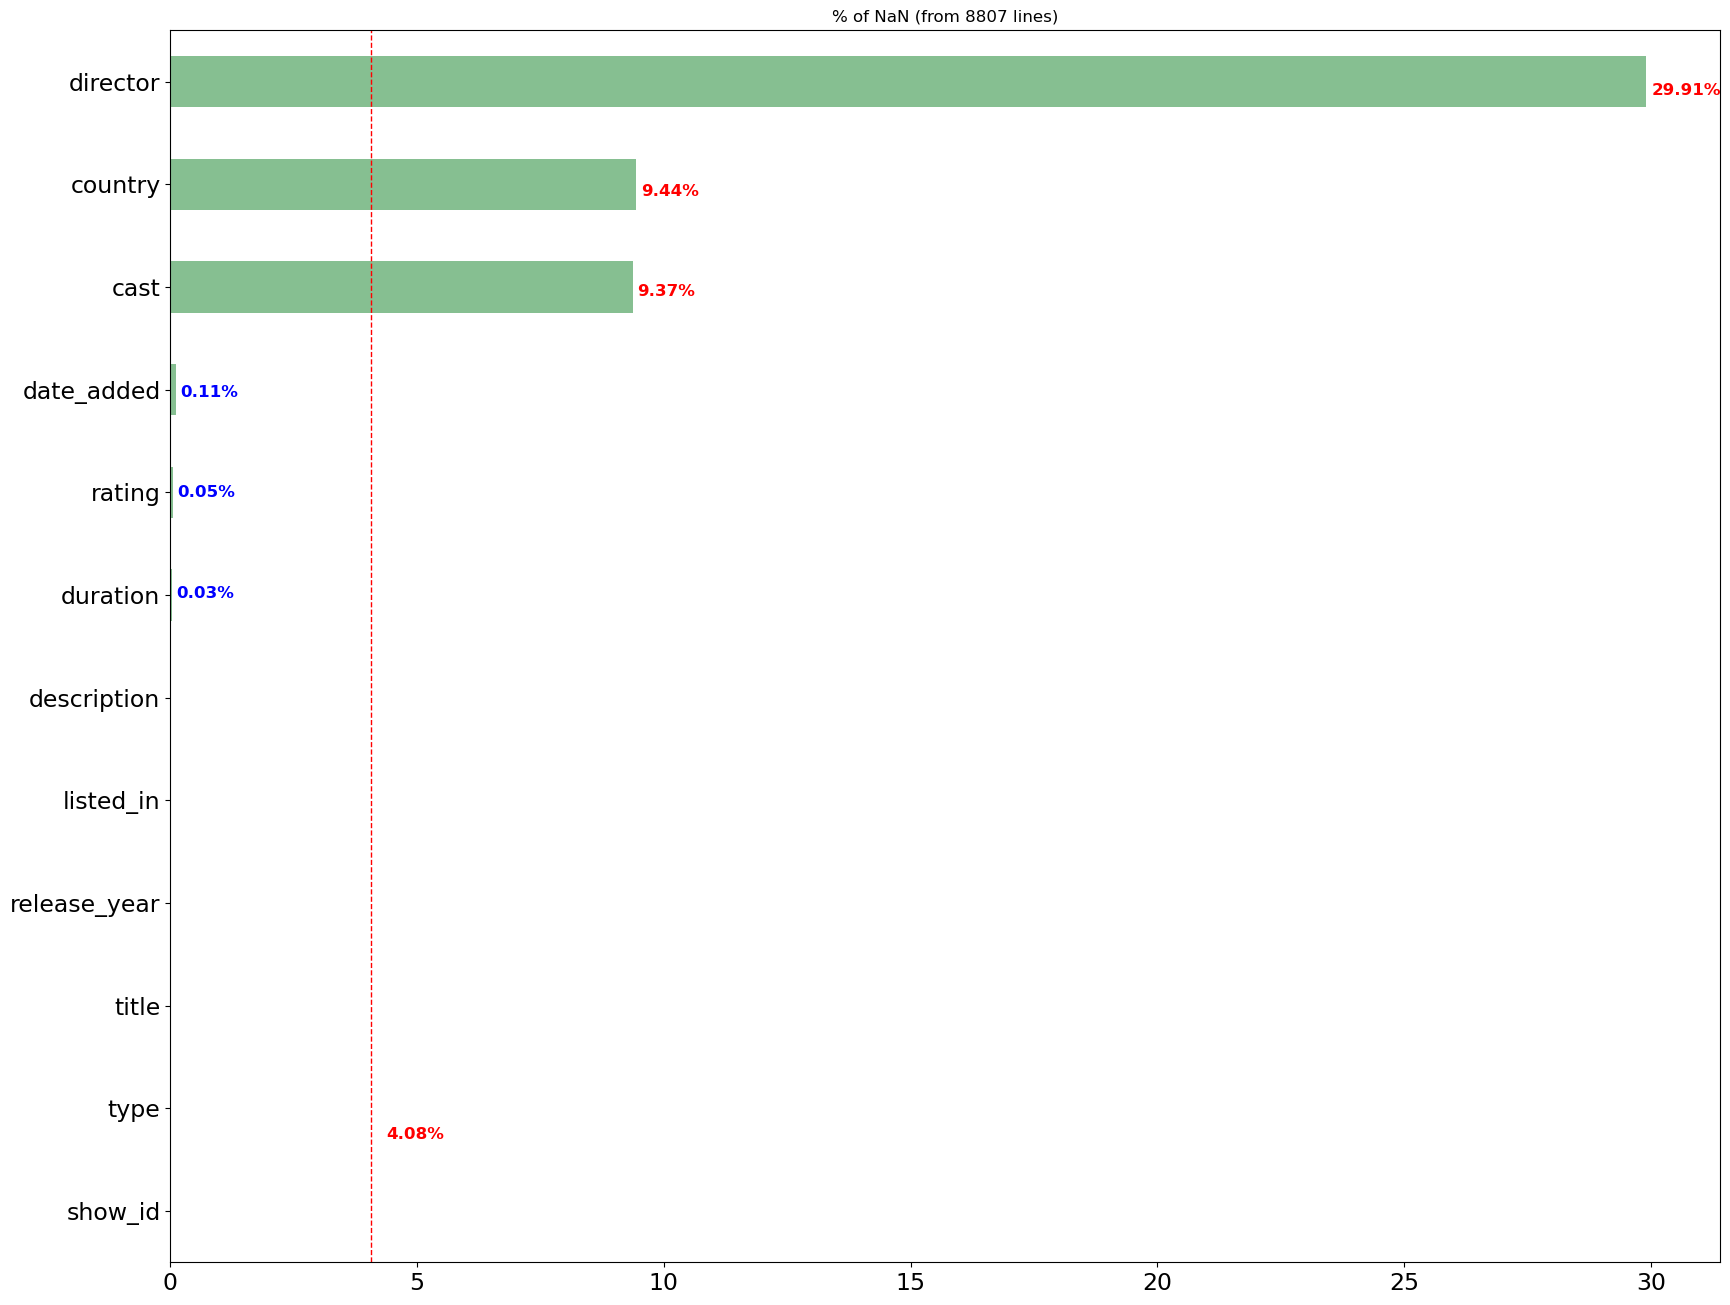

In [8]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(20, 16), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold
percent_hbar(df, old_threshold=None)